In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pdpbox import pdp, get_dataset,info_plots

In [32]:
df = pd.read_csv('heart_clean.csv')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [34]:
df.dtypes

Age                 int64
Sex                 int64
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
HeartDisease        int64
dtype: object

/Users/haibilu/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


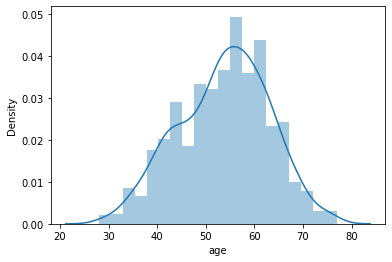

In [4]:
sns.distplot(df['age'])
plt.show()

In [6]:
df['age'].max()


77

In [7]:
df['age'].min()

28

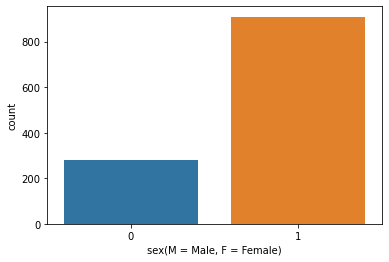

In [9]:
sns.countplot(x = 'sex', data = df)
plt.xlabel ("sex(M = Male, F = Female)")
plt.show()

In [11]:
df.corr()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
age,1.000000,0.015096,0.149055,0.257692,-0.046472,0.178923,0.194595,-0.368676,0.188095,0.245093,0.237749,0.262029
sex,0.015096,1.000000,0.138405,-0.006443,-0.208441,0.110961,-0.022225,-0.181837,0.194380,0.096390,0.127913,0.311267
chest pain type,0.149055,0.138405,1.000000,0.009466,-0.109396,0.076492,0.035705,-0.337491,0.403428,0.224106,0.276949,0.460127
resting bp s,0.257692,-0.006443,0.009466,1.000000,0.099037,0.088235,0.095860,-0.101357,0.142435,0.176111,0.089384,0.121415
cholesterol,-0.046472,-0.208441,-0.109396,0.099037,1.000000,-0.239778,0.150879,0.238028,-0.033261,0.057451,-0.100053,-0.198366
fasting blood sugar,0.178923,0.110961,0.076492,0.088235,-0.239778,1.000000,0.032124,-0.118689,0.053053,0.031193,0.145902,0.216695
resting ecg,0.194595,-0.022225,0.035705,0.095860,0.150879,0.032124,1.000000,0.058812,0.037821,0.126023,0.093629,0.073059
max heart rate,-0.368676,-0.181837,-0.337491,-0.101357,0.238028,-0.118689,0.058812,1.000000,-0.377691,-0.183688,-0.350750,-0.413278
exercise angina,0.188095,0.194380,0.403428,0.142435,-0.033261,0.053053,0.037821,-0.377691,1.000000,0.370772,0.393408,0.481467
oldpeak,0.245093,0.096390,0.224106,0.176111,0.057451,0.031193,0.126023,-0.183688,0.370772,1.000000,0.524639,0.398385


<AxesSubplot:>

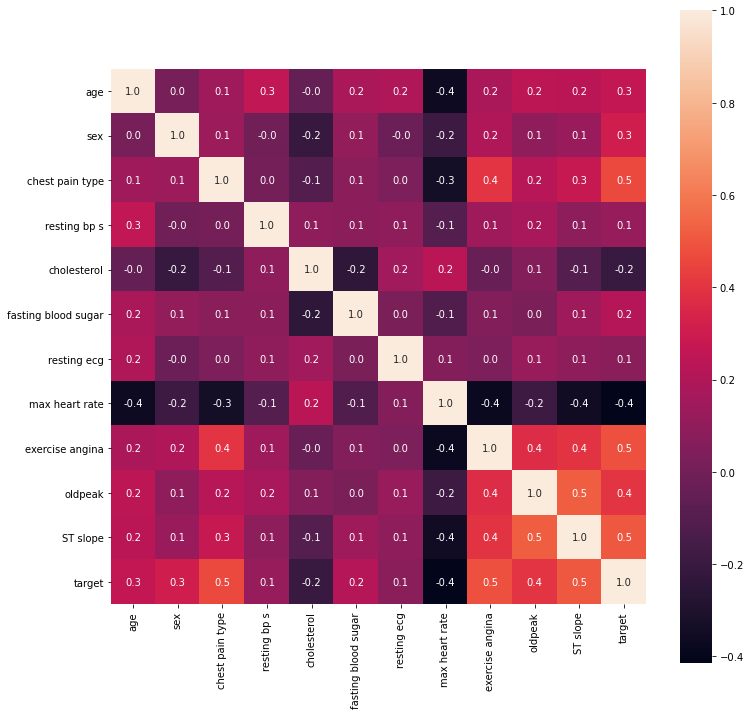

In [20]:
plt.figure(figsize =(12,12))
sns.heatmap(df.corr(), annot = True, fmt = '.1f', square =True)

<AxesSubplot:xlabel='target', ylabel='age'>

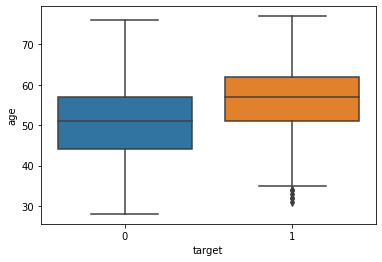

In [22]:
sns.boxplot(x= df['target'], y = df['age'])

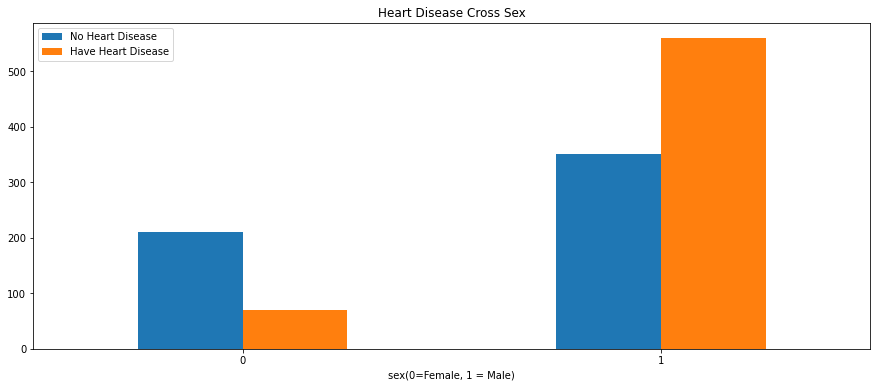

In [27]:
pd.crosstab(df.sex,df.target).plot(kind = 'bar', figsize = (15,6))
plt.title("Heart Disease Cross Sex")
plt.xlabel('sex(0=Female, 1 = Male)')
plt.xticks(rotation = 0)
plt.legend(["No Heart Disease", "Have Heart Disease"])


In [40]:
df['Sex'][df['Sex'] == 0] = 'female'
df['Sex'][df['Sex'] == 1] = 'male'

df['ChestPainType'][df['ChestPainType'] == 1]= 'typical angina'
df['ChestPainType'][df['ChestPainType'] == 2] = 'atypical angina'
df['ChestPainType'][df['ChestPainType'] == 3] = 'non-anginal pain'
df['ChestPainType'][df['ChestPainType'] == 4] = 'asymptomatic'

df['FastingBS'][df['FastingBS'] == 0] = 'lower_than_120mg/ml'
df['FastingBS'][df['FastingBS'] == 1] = 'greater_than_120mg/ml'

df['RestingECG'][df['RestingECG'] == 0] = 'normal'
df['RestingECG'][df['RestingECG'] == 1] = 'st-t_wave_abnormality'
df['RestingECG'][df['RestingECG'] == 2] = 'left_ventricular_hypertrophy'

df['ExerciseAngina'][df['ExerciseAngina'] == 0] = 'no'
df['ExerciseAngina'][df['ExerciseAngina'] == 1] = 'yes'

df['ST_Slope'][df['ST_Slope'] == 1] = 'upsloping'
df['ST_Slope'][df['ST_Slope'] == 2] = 'flat'
df['ST_Slope'][df['ST_Slope'] == 3] = 'downsloping'




In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    object 
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 86.2+ KB


In [38]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS          object
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [42]:
df.to_csv('heart_clean_processed.csv', index = False)

In [13]:
df = pd.get_dummies(df)

In [30]:
df.columns

Index(['Unnamed: 0', 'Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_female', 'Sex_male', 'ChestPainType_4',
       'ChestPainType_asymptomatic', 'ChestPainType_atypical angina',
       'ChestPainType_non-anginal pain', 'FastingBS_greater_than_120mg/ml',
       'FastingBS_lower_than_120mg/ml',
       'RestingECG_left_ventricular_hypertrophy', 'RestingECG_normal',
       'RestingECG_st-t_wave_abnormality', 'ExerciseAngina_no',
       'ExerciseAngina_yes', 'ST_Slope_3', 'ST_Slope_downsloping',
       'ST_Slope_flat'],
      dtype='object')

In [15]:
df.head()

,Unnamed: 0,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_female,Sex_male,ChestPainType_4,...,FastingBS_greater_than_120mg/ml,FastingBS_lower_than_120mg/ml,RestingECG_left_ventricular_hypertrophy,RestingECG_normal,RestingECG_st-t_wave_abnormality,ExerciseAngina_no,ExerciseAngina_yes,ST_Slope_3,ST_Slope_downsloping,ST_Slope_flat
0,0,40,140,289.0,172,0.0,0,0,1,0,...,0,1,0,1,0,1,0,0,0,1
1,1,49,160,180.0,156,1.0,1,1,0,0,...,0,1,0,1,0,1,0,0,1,0
2,2,37,130,283.0,98,0.0,0,0,1,0,...,0,1,0,0,1,1,0,0,0,1
3,3,48,138,214.0,108,1.5,1,1,0,1,...,0,1,0,1,0,0,1,0,1,0
4,4,54,150,195.0,122,0.0,0,0,1,0,...,0,1,0,1,0,1,0,0,0,1


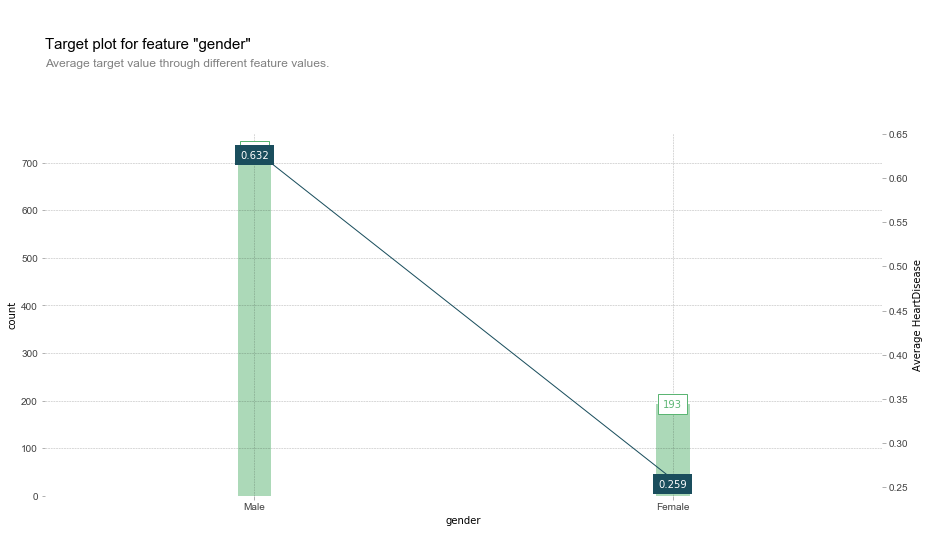

In [27]:
fig, axes, summary_df = info_plots.target_plot(df = df, feature = 'Sex_female', 
                                               feature_name = 'gender',
                                               target = ['HeartDisease'])
_ = axes['bar_ax'].set_xticklabels(['Male', 'Female'])

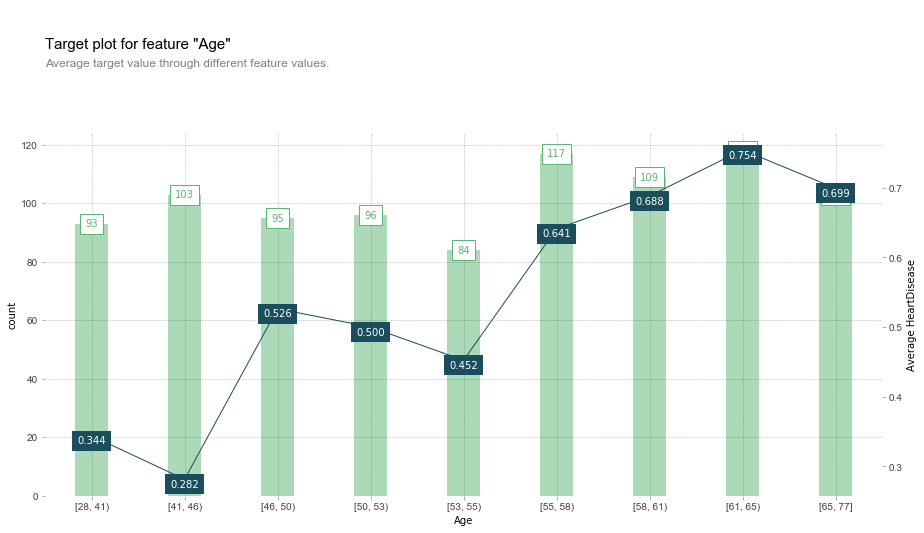

In [18]:
fig, axes, summary_df = info_plots.target_plot(df = df, feature = 'Age', 
                                               feature_name = 'Age',
                                               target = ['HeartDisease'])



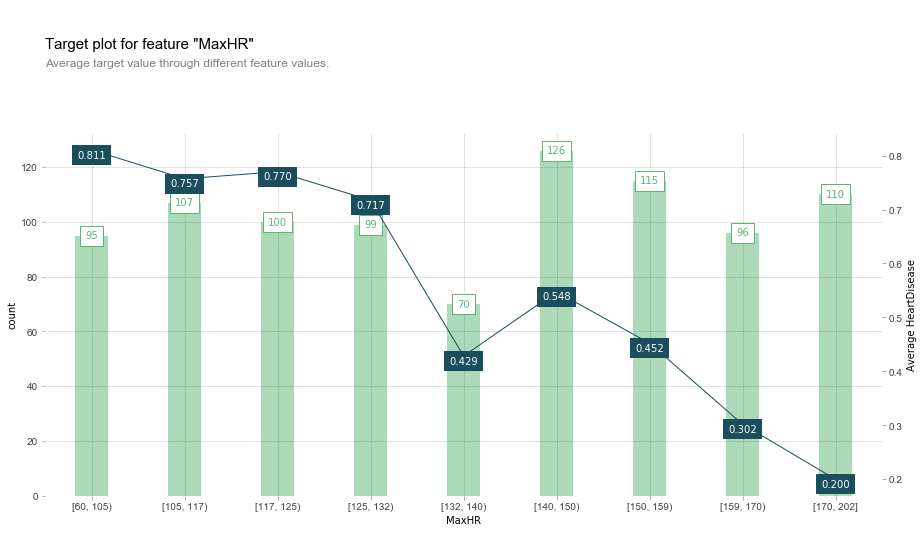

In [21]:
fig, axes, summary_df = info_plots.target_plot(df = df, feature = 'MaxHR', 
                                               feature_name = 'MaxHR',
                                               target = ['HeartDisease'])

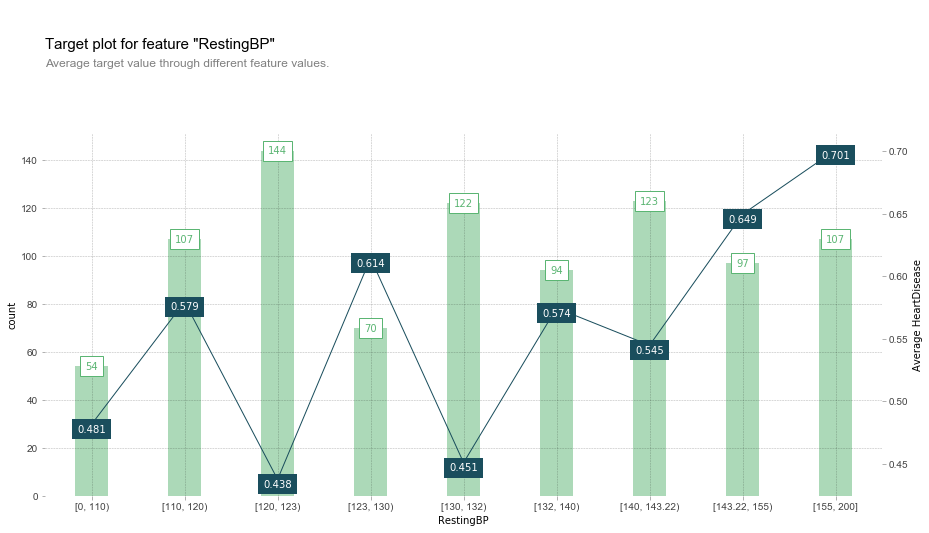

In [23]:
fig, axes, summary_df = info_plots.target_plot(df = df, feature = 'RestingBP', 
                                               feature_name = 'RestingBP',
                                               target = ['HeartDisease'])

In [31]:
fig, axes, summary_df = info_plots.target_plot(df = df, feature = 'ChestPainType_asymptomatic' 
                                               feature_name = 'ChestPainType',
                                               target = ['HeartDisease'])

SyntaxError: positional argument follows keyword argument (<ipython-input-31-620f2141e00b>, line 1)